# Размещение модели нейронной сети на хостинге в интернете

Данный сервис доступен по ссылке:
http://87.249.49.173:8501/

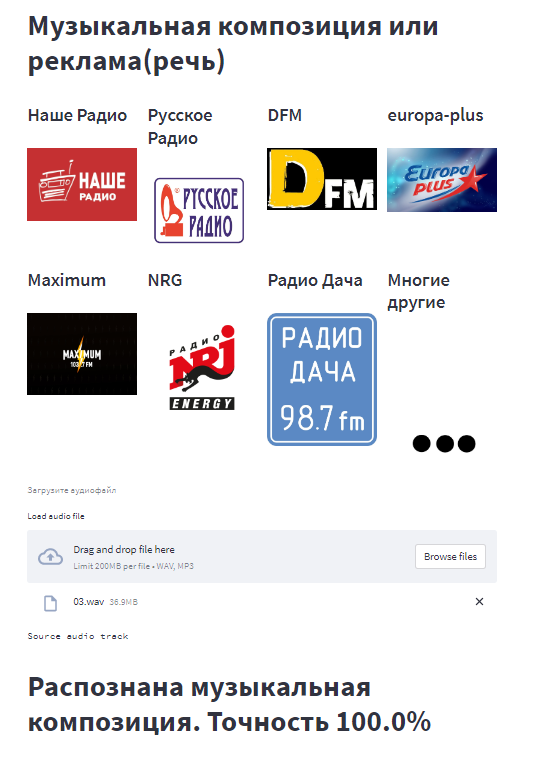

# Функции для распознавания

In [ ]:
# Сохранение кода скрипта в переменной text_code

segment_file = '''

from tensorflow.keras.models import load_model
import librosa
import numpy as np

# Имя файла с весами модели
MODEL_NAME = 'recognition.h5'
model = load_model(MODEL_NAME)  

def wav2mfcc(file_path, length=22050, step=22050):
  out_mfcc = []
  
  y, sr = librosa.load(file_path)
  
  while (len(y) > length):
    out_section = []

    if len(y) > length:
      section = y[:length]
      section = np.array(section)
    else:
      section = y[:len(y)]
      section = np.array(section)

    mfcc = librosa.feature.mfcc(section, sr)
    chroma_stft = librosa.feature.chroma_stft(section, sr=sr)

    rms = librosa.feature.rms(y=section)
    spec_cent = librosa.feature.spectral_centroid(section, sr=sr)
    spec_bnw = librosa.feature.spectral_bandwidth(section, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(section, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(section)

    onset_subbands = librosa.onset.onset_strength_multi(section, sr=sr) #, channels=[0, 32, 64, 96, 128]) # Вычисление огибающую силы начала спектрального потока по нескольким каналам

    # Спектральные особенности
    chroma_cqt = librosa.feature.chroma_cqt(y=section, sr=sr)         # Constant-Q хроматограмма
    chroma_cens = librosa.feature.chroma_cens(y=section, sr=sr)       # Вычисление варианта цветности «Нормализованная энергия цветности» (CENS)
    melspectrogram = librosa.feature.melspectrogram(y=section, sr=sr) # Вычисление спектрограммы в масштабе мела.
    spectral_contrast = librosa.feature.spectral_contrast(y=section)  # Вычисление спектрального контраста
    poly_features = librosa.feature.poly_features(y=section, sr=sr)   # Получение коэффициента подгонки полинома n-го порядка к столбцам спектрограммы.
    tonnetz = librosa.feature.tonnetz(y=section, sr=sr)

    out_section.extend(mfcc)
    out_section.extend(chroma_stft)
    out_section.extend(rms)
    out_section.extend(spec_cent)
    out_section.extend(spec_bnw)
    out_section.extend(rolloff)
    out_section.extend(zcr)
    out_section.extend(onset_subbands)
    out_section.extend(chroma_cqt)
    out_section.extend(chroma_cens)
    out_section.extend(melspectrogram)
    out_section.extend(spectral_contrast)
    out_section.extend(poly_features)
    out_section.extend(tonnetz)
    out_mfcc.append(out_section)
    y = y[step:]
  
  out_mfcc = np.array(out_mfcc)
  return out_mfcc


def process(track, length=22050, step = 22050):

  classes= ['Music', 'Speech']

  out = wav2mfcc(track, length=length, step=step)

  # Добавляем ону размерность, этого требует model.predict
  out = out[..., None]

  # Делаем predict
  pred = model.predict(out)

  sum_music = 0
  sum_speech = 0

  for i in range(pred.shape[0]):
    if np.argmax(pred[i]) == 0:
      sum_music += 1
    else:
      sum_speech += 1

  if sum_music > sum_speech:
    total = round((sum_music / pred.shape[0]) * 100, 2)
    return f"Распознана музыкальная композиция. Точность {total}%"

  else:
    total = round((sum_speech / pred.shape[0]) * 100, 2)
    return f"Распознана реклама(разговоры). Точность {total}%"
    
'''

# Запись содержимого переменной в файл скрипта
with open('segment.py', 'w') as file:
    file.write(segment_file)

# Streamlit

In [ ]:
# Моя
app_file = '''


# !apt install libsndfile  # - Script Error
# apt install libsndfile   # - Script Error

import streamlit as st
import segment

st.title('Распознавание радиоэфира')
st.title('Музыкальная композиция или реклама(речь)')

col1, col2, col3, col4  = st.columns(4)

col1.subheader("Наше Радио")
col1.image("Наше Радио.jpg")

col2.subheader("Русское Радио")
col2.image("Русское Радио.jpg")

col3.subheader("DFM")
col3.image("DFM.jpg")

col4.subheader("europa-plus")
col4.image("europa-plus.jpg")


col5, col6, col7, col8  = st.columns(4)

col5.subheader("Maximum")
col5.image("Maximum.jpg")

col6.subheader("NRG")
col6.image("NRG.jpg")

col7.subheader("Радио Дача")
col7.image("Радио Дача.jpg")

col8.subheader("Многие другие")
col8.image("Многие другие.png")

st.caption('Загрузите аудиофайл')

track_file = st.file_uploader('Load audio file', type=['wav'])  # Добавление загрузчика файлов

if not track_file is None:                                           # Выполнение блока, если загружено изображение
    results = segment.process(track_file)                            # Обработка звука с помощью функции, реализованной в другом файле
    st.text('Source audio track')
    st.title(f'{results}')
'''

with open('app.py', 'w') as file:
    file.write(app_file)

# setup.sh и Procfile

In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!apt install libsndfile1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-4ubuntu0.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!heroku install libsndfile1

 ›   Warning: install is not a heroku command.
Did you mean restart? [y/n]: 
 ›   Error: Run heroku help for a list of available commands.


In [ ]:
# Не работает
!heroku run apt install libsndfile1  
!heroku run apt install ffmpeg 
!heroku run apt install libsndfile-dev

In [ ]:
!heroku run apt install Aptfile

In [ ]:
!heroku buildpacks:add --index 1 heroku-community/apt Aptfile

In [ ]:
!heroku buildpacks

=== myrecognitionwork Buildpack URLs
1. https://github.com/heroku/heroku-buildpack-apt
2. heroku-community/apt
3. heroku/python


In [ ]:
# Создадим файл конфигурации Streamlit:
setup_file = '''

# Не работает

!apt install libsndfile1
!apt install libsndfile-dev
!apt install ffmpeg
!apt install Aptfile

apt install libsndfile1
apt install libsndfile-dev
apt install ffmpeg
apt install Aptfile

!heroku run apt install libsndfile1  
!heroku run apt install ffmpeg 
!heroku run apt install libsndfile-dev
!heroku run apt install Aptfile

!apt install libsndfile1
!apt-get install libsndfile1

!heroku buildpacks:add --index 1 heroku-community/apt Aptfile
!heroku buildpacks:add --index 1 https://github.com/heroku/heroku-buildpack-apt

apt install libsndfile1
apt-get install libsndfile1

apt-get install Aptfile
!apt-get install Aptfile


mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
# enableXsrfProtection=false\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

# Не работает -  App Error если писать здесь

'''
# apt-get install libsndfile1   # Ошибка - Heroku не работает при такой команде


with open('setup.sh', 'w') as file:
    file.write(setup_file)


# Создадим командный файл для запуска сервиса:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)


# Удалим лишние файлы, находящиеся в текущей папке в Colab по умолчанию:
!rm -rf sample_data

In [ ]:
pip https://github.com/bastibe/python-soundfile/releases/download/0.11.0b3/soundfile-0.11.0b3-py2.py3-none-macosx_10_9_arm64.whl

In [ ]:
!apt install libsndfile

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libsndfile


In [ ]:
!apt-get install Aptfile

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package Aptfile


# Install Heroku

Выполним начальную настройку **Git**: зададим имя пользователя и e-mail. Укажите свой email и имя-фамилию:

In [ ]:
!git config --global user.email "kront86@gmail.com"
!git config --global user.name "Mikhail Teplov"

# Установим инструменты командной строки Heroku CLI (Command Line Interface):
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0   8927      0 --:--:-- --:--:-- --:--:--  8927
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1753  100  1753    0     0  20383      0 --:--:-- --:--:-- --:--:-- 20383
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/terms-of-service


**Проверим правильность установки:**


In [ ]:
!heroku --version

heroku/7.65.0 linux-x64 node-v14.19.0


# LOGIN  & API_KEY

In [ ]:
# LOGIN = 'blind86@mail.ru'  # Укажите свой логин
# API_KEY = 'ce3bea1d-0a51-4939-bdff-2df098710c64'  # Укажите свой API-key

LOGIN = 'kront86@gmail.com'  # Укажите свой логин
API_KEY = 'c037d56c-2e05-4fa4-b123-068d7dd7d106'  # Укажите свой API-key



auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

# Создание requirements_file

In [ ]:
# Создадим файл требований необходимых пакетов:
requirements_file = '''

streamlit==1.13.0
tensorflow-cpu==2.10.0
librosa==0.9.2 
'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
# Создадим файл требований необходимых пакетов:
requirements_file = '''

streamlit==1.13.0
tensorflow-cpu==2.10.0
librosa==0.9.2 


# sndfile # ==0.2.0  # При установке выдает ошибку. В Colab устанавливается

#________________________
# Дополнительные библиотеки
SoundFile==0.11.0
numba==0.56.3
audioread==3.0.0    # 2.1.9  3.0.0
pysoundfile==0.9.0
#_________________________________

#____________________________________________________________________
# pysoundfile==0.9.0
# При установки данной библиотеки выводит другую ошибку:
# OSError: ctypes.util.find_library() did not manage to locate a library called 'sndfile'
#___________________________________________________________________________

# librosa==0.7.2
# numpy==1.21.6
# numba==0.48

# OGGNAME=libogg-1.3.5
# VORBISNAME=libvorbis-1.3.7
# FLACNAME=flac-1.3.3
# OPUSNAME=opus-1.3.1
# MPG123VERSION=1.29.3
# LAMEVERSION=3.100
# SNDFILE_VERSION=1.1.0



# sudo apt-get install libsndfile1

#______________________________________________
# Из решения с сайта

# audioread
# librosa
# numba
# numpy
# SoundFile

aniso8601
certifi
cffi
Click
decorator
ffmpeg-python
Flask
Flask-RESTful
future
gunicorn
itsdangerous
Jinja2
joblib

# audioread==2.1.8
# librosa==0.7.2
# numba==0.48.0
# numpy==1.18.1
# SoundFile==0.10.3.post1


# aniso8601==8.0.0
# certifi==2019.11.28
# cffi==1.14.0
# Click==7.0
# decorator==4.4.2
# ffmpeg-python==0.2.0
# Flask==1.1.1
# Flask-RESTful==0.3.8
# future==0.18.2
# gunicorn==20.0.4
# itsdangerous==1.1.0
# Jinja2==2.11.1
# joblib==0.14.1

# llvmlite==0.31.0
# MarkupSafe==1.1.1
# marshmallow==3.2.2
# pycparser==2.20
# pydub==0.23.1
# pytz==2019.3
# resampy==0.2.2
# scikit-learn==0.22.2.post1
# six==1.14.0
# Werkzeug==1.0.0
# wincertstore==0.2
# # pandas==1.0.1
# pathlib==1.0.1

# scipy==1.4.1                  # 24.6 MB
#______________________________________________

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
# pip install -r requirements.txt

# Git commit

In [ ]:
!git init
!git add .
!git commit -m "My first commit"

Initialized empty Git repository in /content/.git/
[master (root-commit) 4caca81] My first commit
 33 files changed, 951 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2022.10.07/13.33.29.962578.log
 create mode 100644 .config/logs/2022.10.07/13.33.55.059309.log
 create mode 100644 .config/logs/2022.10.07/13.34.17.754134.log
 create mode 100644 .config/logs/2022.10.07/13.34.26.675197.log
 create mode 100644 .config/logs/2022.10.07/13.34.49.852351.log
 create mode 100644 .config/logs/2022.10.07/13.34.50.628315.log
 create mode 100644 Aptfile
 create mode 100644 DFM.jpg
 create mode 100644 Maximum.jpg
 create mode 100644 NRG.jpg
 create mode 100644 Procfile
 c

#Heroku create

In [ ]:
!heroku create myrecognitionwork

Creating ⬢ myrecognitionwork... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾⣽⣻Creating ⬢ myrecognitionwork... done
https://myrecognitionwork.herokuapp.com/ | https://git.heroku.com/myrecognitionwork.git


# Git push heroku

In [ ]:
# Без этого не работает
!git push heroku master

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 506 bytes | 506.00 KiB/s, done.
Total 5 (delta 3), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-22 stack
remote: -----> Using buildpack: heroku/python
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the same version as the last build: python-3.10.8
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> Requirements file has been changed, clearing cached dependencies
remote: -----> Installing python-3.10.8
remote: -----> Installing pip 22.2.2, setuptools 63.4.3 and wheel 0.37.1
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote:        Collecting streamlit==1.13.0
remote:          Downloading streamlit-1.13.0-py2.py3-none-any.wh

# Результат

Данный сервис доступен по ссылке:
http://87.249.49.173:8501/

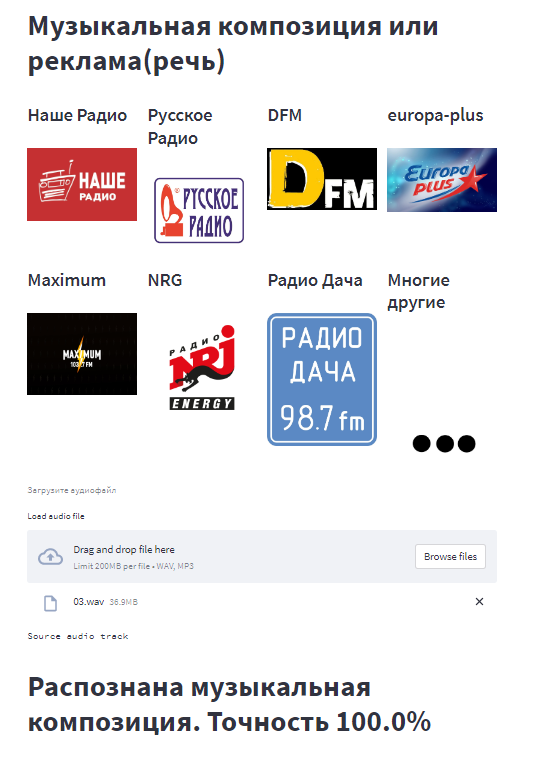

# Ошибки

##  1.  Если не устанавливать **librosa** в requirements_file

**ModuleNotFoundError: No module named 'librosa'**

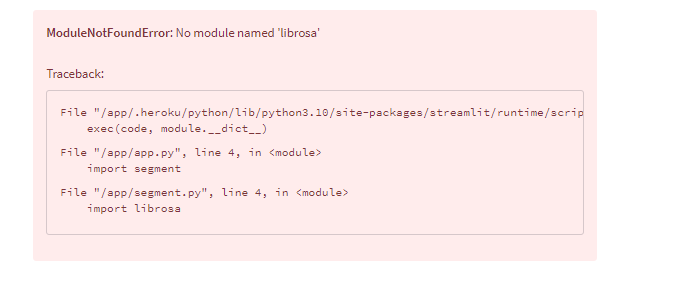

## 2. Установка **librosa**

In [ ]:
requirements_file = '''

streamlit==1.13.0
tensorflow-cpu==2.10.0
librosa==0.9.2
'''

Если устанавливать только три эти библиотеки, то выводит такую ошибку:

OSError: cannot load library **'libsndfile.so'**: **libsndfile.so**: cannot open shared object file: No such file or directory

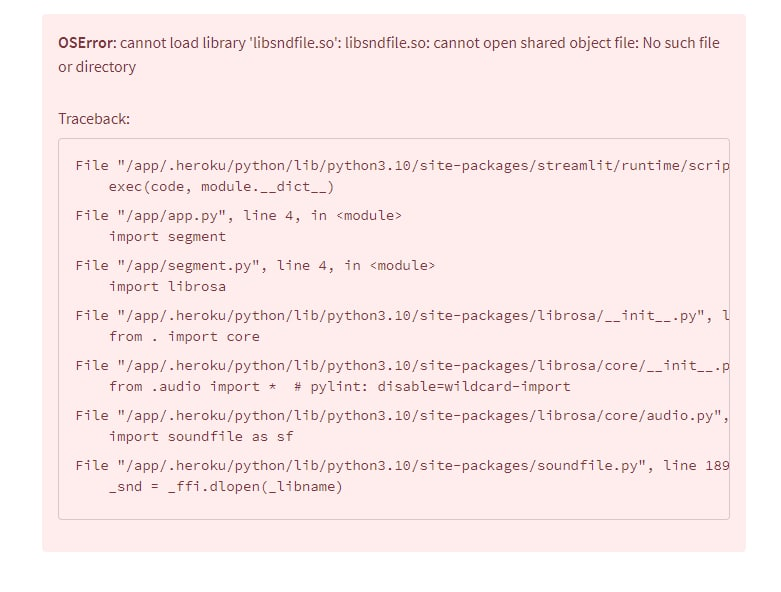


## 3. Дополнительные бибилиотеки

Если устанавливать больше библиотек

Включена библиотека: **pysoundfile**==0.9.0

Тогда происходит ошибка:

OSError: ctypes.util.find_library() did not manage to locate a library called **'sndfile**'

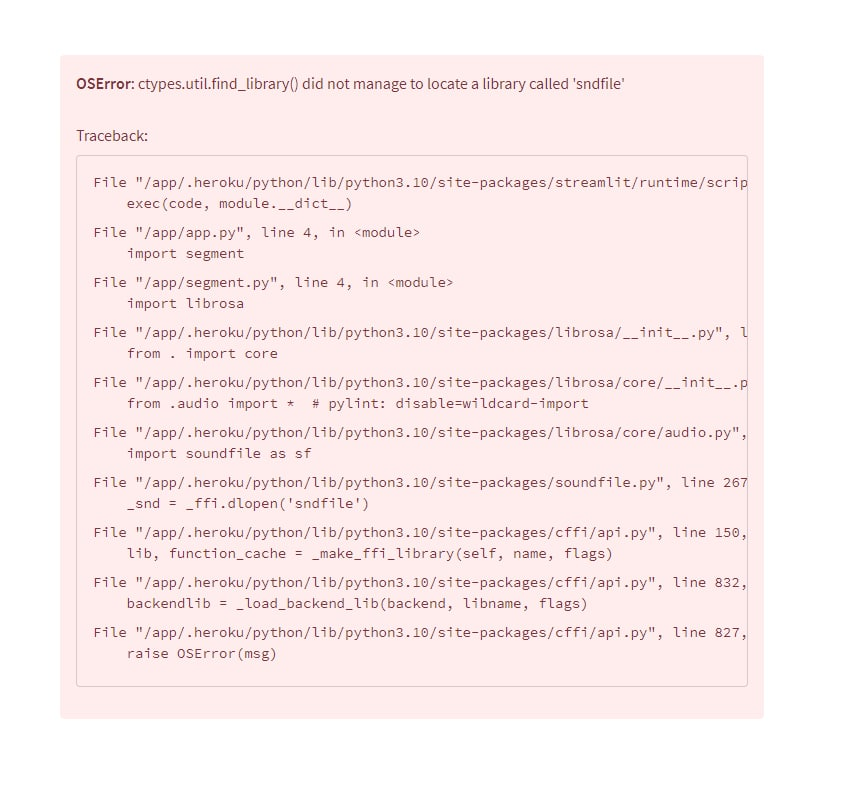

# Ниже пробовал разные методы

In [ ]:
!sudo apt-get install libsndfile1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-4ubuntu0.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
heroku buildpacks:set heroku/python
heroku buildpacks:add --index 1 heroku-community/apt
heroku buildpacks

In [ ]:
!heroku buildpacks:add --index 1 heroku-community/apt

Buildpack added. Next release on myrecognition will use:
  1. heroku-community/apt
  2. heroku/python
Run git push heroku main to create a new release using these buildpacks.


In [ ]:
!git push heroku main

In [ ]:
!heroku buildpacks:set heroku/python

 ›   Error: The buildpack heroku/python is already set on your app.


In [ ]:
# Чтобы использовать последнюю стабильную версию:

!heroku buildpacks:add --index 1 heroku-community/apt

 ›   Error: Unexpected argument: Aptfile
 ›   See more help with --help


In [ ]:
# Чтобы использовать версию edge (то есть код в этом репозитории):

!heroku buildpacks:add --index 1 https://github.com/heroku/heroku-buildpack-apt

Buildpack added. Next release on myrecognition will use:
  1. https://github.com/heroku/heroku-buildpack-apt
  2. heroku-community/apt
  3. heroku/python
Run git push heroku main to create a new release using these buildpacks.


In [ ]:
!heroku run pip install Aptfile

In [ ]:
!heroku run pip install librosa

In [ ]:
!git remote -v 

heroku	https://git.heroku.com/myrecognition.git (fetch)
heroku	https://git.heroku.com/myrecognition.git (push)


Вы можете использовать команду `git remote`, чтобы проверить, что для вашего приложения установлен удаленный репозиторий с именем **heroku**:

In [ ]:
!heroku run env -a myrecognitionwork --remote staging

In [ ]:
!heroku logs -t

In [ ]:
!heroku logs --tail

2022-10-15T21:16:15.509866+00:00 app[api]: Release v1 created by user kront86@gmail.com
2022-10-15T21:16:15.509866+00:00 app[api]: Initial release by user kront86@gmail.com
2022-10-15T21:16:15.818097+00:00 app[api]: Release v2 created by user kront86@gmail.com
2022-10-15T21:16:15.818097+00:00 app[api]: Enable Logplex by user kront86@gmail.com
2022-10-15T21:16:31.000000+00:00 app[api]: Build started by user kront86@gmail.com
2022-10-15T21:16:32.018600+00:00 heroku[router]: at=info code=H81 desc="Blank app" method=GET path="/healthz" host=myrecognitionwork.herokuapp.com request_id=2d9c2010-0f45-4012-bd5c-afc3efb8a99d fwd="46.242.12.185" dyno= connect= service= status=502 bytes= protocol=https
2022-10-15T21:18:33.913248+00:00 heroku[router]: at=info code=H81 desc="Blank app" method=GET path="/healthz" host=myrecognitionwork.herokuapp.com request_id=4b84e950-54ae-452a-86ec-92f49c358e9b fwd="46.242.12.185" dyno= connect= service= status=502 bytes= protocol=https
2022-10-15T21:18:44.939752+0